# Sequencial reading plot

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def search_log(filename):
    '''
    Function to read bytes from a file
    '''
    flow = pd.read_csv(filename, delimiter='\s+',index_col = 0, names = header)
    a=flow.to_numpy()
    flow_node=0
    for i in range(len(a[0])):
        if a.mean(0)[i]!=a[0,i]:
            flow_node+= sum(a[:,i])
    return flow_node

In [3]:
def searchGB(filename):
    '''
    Function to search total GB from a log file
    '''
    fopen = open(filename,mode='r+')
    fread = fopen.readlines()
    val=0
    for line in fread:
        if "GB" in line:
            b = [s for s in line.split() if "GB" in s]
            val=float(str(b)[3:-6])
    return val

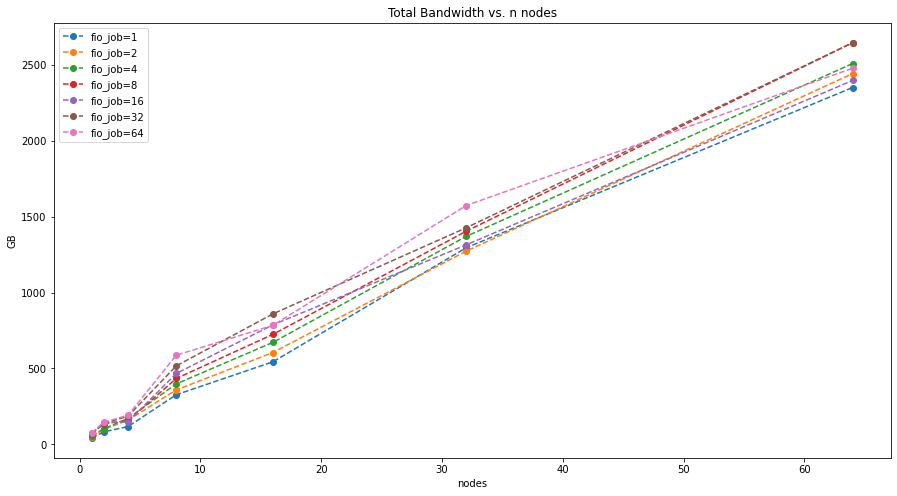

In [4]:
# Read the different files with for n nodes and n fio_jobs
header = ["Timestamp", "server1", "server2"]
HOME= "/home/ccochato/Desktop/Computing/HPC/PROJECT/FIO/fio-test/seqread/"
nodes = [1,2,4,8,16,32, 64]
fiojobs = [1,2,4,8, 16, 32, 64]
#fiojobs = [1,2]
plt.figure(figsize=(15, 8))
for fjob in fiojobs:
    total_flow=[]
    total_fio=[]
    for node in nodes:
        path=HOME+str(node)+'_node/'
        content=os.listdir(path)
        fiojob = [s for s in content if "fiojob_"+str(fjob) in s]
        if len(fiojob)>1:
            if len(fiojob[0])<len(fiojob[1]): fiojob=fiojob[0]
            else: fiojob = fiojob[1]
        else:
            fiojob= fiojob[0]
        flow_node = 0
        fio_node = 0
        for folder in os.listdir(path+fiojob):
            flow_node+= search_log(path+fiojob+"/"+folder+"/netlogs")
            fio_node+= searchGB(path+fiojob+"/"+folder+"/output.log")
        total_flow.append(flow_node*1e-9)
        total_fio.append(fio_node)
    #plt.plot(nodes,total_flow, '--',label='fio_tjob='+str(fjob))
    plt.plot(nodes,total_fio,'o--',label='fio_job='+str(fjob))
plt.legend()
plt.xlabel('nodes')
plt.ylabel('GB')
plt.title("Total Bandwidth vs. n nodes")
plt.show()